## Chankong and Haimes function 

Problem taken from \[Chankong, Vira; Haimes, Yacov Y. (1983). Multiobjective decision making. Theory and methodology. ISBN 0-444-00710-5.\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 2 + (x_1 - 2)^2 + (x_2 - 1)^2$

$f_2 (x_1,x_2) = 9 x_1 - (x_2 - 1)^2$

*subjected to*

$x_1^2 + x_2^2 \le 225$

$x_1 - 3 x_2 + 10 \ge 0.0$

*in the domain*

$-20 \le x_1,x_2 \le 20$

In [1]:
from mosa import Anneal
from time import time
%matplotlib inline

### Translates the Chankong and Haimes problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. The argument of the Python function is a dictionary with just one key, $X$, representing a trial solution to the problem. The constraints are defined as $c_1$ and $c_2$. If they are not satisfied, an *ad hoc* dominated solution is defined, considering the Pareto front from a previous unconstrained run. The return value must be a list containing $f_1$ and $f_2$.

In [2]:
def fobj(solution):
    f1=2.0+pow((solution["X"][0]-2),2)+pow((solution["X"][1]-1),2)
    f2=9.0*solution["X"][0]-pow((solution["X"][1]-1),2)
    c1=pow(solution["X"][0],2)+pow(solution["X"][1],2)
    c2=solution["X"][0]-3.0*solution["X"][1]+10.0
    
    if c1>225.0 or c2>0.0:
        f1=1000.0
        f2=0.0
    
    return [f1,f2]

### Initialization

First, an Anneal object is created.

Then, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the trial solutions to the problem. In the case of the Chankong and Haimes problem, we used only one key because both $x_1$ and $x_2$ above are restricted to the same domain. Since the solution space is continuous for $X$ in the domain defined above, the value **None** is assigned to $X$.

In [3]:
opt=Anneal()
opt.archive_size=10000
opt.maximum_archive_rejections=10000

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
      Developed by Dr. Roberto G. A. Veiga
   Universidade Federal do ABC (UFABC), Brazil




In [4]:
opt.population={"X":None}

### Hot run

A first run starting at very high temperatures (1000) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

In [5]:
opt.initial_temperature=1000.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X":2}
opt.mc_step_size={"X":2.0}
opt.solution_bounds={"X":[-20.0,20.0]}

In [6]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the solution: 2
        Continuous sampling space
        Boundaries: [-20.0000,20.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 2.000000
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1000.000000
    Number of accepted moves: 967.
    Fraction of accepted moves: 0.967000.
    Number of archive updates: 158.
    Fraction of archive updates in accepted moves: 0.163392.
------
T

    Number of accepted moves: 861.
    Fraction of accepted moves: 0.861000.
    Number of archive updates: 25.
    Fraction of archive updates in accepted moves: 0.029036.
------
TEMPERATURE: 142.395741
    Number of accepted moves: 826.
    Fraction of accepted moves: 0.826000.
    Number of archive updates: 36.
    Fraction of archive updates in accepted moves: 0.043584.
------
TEMPERATURE: 135.275954
    Number of accepted moves: 859.
    Fraction of accepted moves: 0.859000.
    Number of archive updates: 72.
    Fraction of archive updates in accepted moves: 0.083818.
------
TEMPERATURE: 128.512157
    Number of accepted moves: 842.
    Fraction of accepted moves: 0.842000.
    Number of archive updates: 55.
    Fraction of archive updates in accepted moves: 0.065321.
------
TEMPERATURE: 122.086549
    Number of accepted moves: 835.
    Fraction of accepted moves: 0.835000.
    Number of archive updates: 56.
    Fraction of archive updates in accepted moves: 0.067066.
------
TEMP

    Number of accepted moves: 609.
    Fraction of accepted moves: 0.609000.
    Number of archive updates: 52.
    Fraction of archive updates in accepted moves: 0.085386.
------
TEMPERATURE: 17.384605
    Number of accepted moves: 540.
    Fraction of accepted moves: 0.540000.
    Number of archive updates: 44.
    Fraction of archive updates in accepted moves: 0.081481.
------
TEMPERATURE: 16.515374
    Number of accepted moves: 510.
    Fraction of accepted moves: 0.510000.
    Number of archive updates: 58.
    Fraction of archive updates in accepted moves: 0.113725.
------
TEMPERATURE: 15.689606
    Number of accepted moves: 495.
    Fraction of accepted moves: 0.495000.
    Number of archive updates: 48.
    Fraction of archive updates in accepted moves: 0.096970.
------
TEMPERATURE: 14.905125
    Number of accepted moves: 529.
    Fraction of accepted moves: 0.529000.
    Number of archive updates: 55.
    Fraction of archive updates in accepted moves: 0.103970.
------
TEMPERAT

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front.

Solutions produced by the "hot run" were taken from the archive.

In [7]:
opt.initial_temperature=1.0
opt.number_of_solution_elements={"X":2}
opt.mc_step_size={"X":1.0}
opt.solution_bounds={"X":[-20.0,20.0]}

In [8]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the solution: 2
        Continuous sampling space
        Boundaries: [-20.0000,20.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 1.000000
------
Initial solution loaded from the checkpoint file...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 79.
    Fraction of accepted moves: 0.079000.
    Number of archive updates: 24.
    Fraction of archive updates in accepted moves: 0.303797.
------
TEMPERATURE: 0.950000
    Number of accepted moves: 98.
    Fraction of accepted moves: 0.098000.
    Number of archive updates: 33.
    Fraction o

    Number of accepted moves: 14.
    Fraction of accepted moves: 0.014000.
    Number of archive updates: 5.
    Fraction of archive updates in accepted moves: 0.357143.
------
TEMPERATURE: 0.110183
    Number of accepted moves: 13.
    Fraction of accepted moves: 0.013000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.307692.
------
TEMPERATURE: 0.104674
    Number of accepted moves: 10.
    Fraction of accepted moves: 0.010000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.100000.
------
TEMPERATURE: 0.099440
    Number of accepted moves: 13.
    Fraction of accepted moves: 0.013000.
    Number of archive updates: 10.
    Fraction of archive updates in accepted moves: 0.769231.
------
TEMPERATURE: 0.094468
    Number of accepted moves: 9.
    Fraction of accepted moves: 0.009000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 0.333333.
------
TEMPERATURE: 0.089745


### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [9]:
purged=opt.purgedominated()
opt.printx(purged)

===
Solutions:
1) {'X': [-2.5760143639080435, 14.754718678881904]}
2) {'X': [-2.5760143639080435, 12.993519889965448]}
3) {'X': [-2.5760143639080435, 12.510442515461168]}
4) {'X': [-2.7562234791272924, 10.813904304908649]}
5) {'X': [-2.415297292686521, 10.097928643544428]}
6) {'X': [-2.415297292686521, 8.33401778331838]}
7) {'X': [-2.645783932925061, 13.086102171637812]}
8) {'X': [-2.645783932925061, 14.030341036743735]}
9) {'X': [-2.645783932925061, 12.91786366399748]}
10) {'X': [-2.645783932925061, 11.890977199747248]}
11) {'X': [-2.7946388825409265, 7.259990138956232]}
12) {'X': [-2.649426456045255, 7.088838743035481]}
13) {'X': [-2.649426456045255, 6.748916758819611]}
14) {'X': [-2.649426456045255, 5.206869522831703]}
15) {'X': [-2.8970704243564334, 10.884008128755136]}
16) {'X': [-2.6770354516600716, 14.218227505857634]}
17) {'X': [-2.922811359685963, 14.218227505857634]}
18) {'X': [-2.299575662910319, 14.332579383265935]}
19) {'X': [-2.103848578845546, 14.332579383265935]}
20) {'

2122) {'X': [-2.7362237449281444, 7.759884114543658]}
2123) {'X': [-2.7362237449281444, 6.853458369185642]}
2124) {'X': [-2.2909519178368445, 6.853458369185642]}
2125) {'X': [-2.2909519178368445, 7.59700220476215]}
2126) {'X': [-2.5550067338799414, 7.59700220476215]}
2127) {'X': [-2.5550067338799414, 7.377724100519496]}
2128) {'X': [-2.645977598801128, 9.352245981232436]}
2129) {'X': [-2.645977598801128, 9.550702885329942]}
2130) {'X': [-2.2505092781550267, 2.814072601188394]}
2131) {'X': [-2.779184781510616, 4.4364072236017]}
2132) {'X': [-2.1071191462112893, 8.397095447921487]}
2133) {'X': [-2.3894448043852186, 10.000971701575224]}
2134) {'X': [-2.3894448043852186, 8.878434312667158]}
2135) {'X': [-2.694406002131784, 8.878434312667158]}
2136) {'X': [-2.376302576408358, 7.8654976199815305]}
2137) {'X': [-2.2321645692042216, 10.215519552958586]}
2138) {'X': [-2.4890803864530278, 10.215519552958586]}
2139) {'X': [-2.609851645450003, 10.215519552958586]}
2140) {'X': [-2.5238985606412228,

706) [169.61733109640403, -169.79252727573032]
707) [163.57263382188057, -163.74783000120686]
708) [123.09662948215967, -123.34542705414832]
709) [188.18610629387518, -188.28689586783537]
710) [116.18462184443761, -116.34289074209022]
711) [149.1802276300045, -149.39183040926656]
712) [161.02762983408599, -161.23923261334804]
713) [138.0538831474986, -138.26548592676062]
714) [135.86628922222354, -136.114435618191]
715) [150.6098453806225, -150.85799177658993]
716) [152.23781169749793, -152.4693203204223]
717) [105.93368285095661, -106.00285278194704]
718) [114.06666193478367, -114.30131931353984]
719) [111.7272378245782, -111.95862353477942]
720) [115.69571932052622, -115.8576354050511]
721) [69.89697159329002, -70.03236598927714]
722) [131.11882239051036, -131.36189027889986]
723) [120.00489833928661, -120.24796622767612]
724) [120.87300130914784, -121.11606919753734]
725) [119.94608102764357, -120.1179665453145]
726) [101.94939418743337, -102.10757029021357]
727) [62.61571561918746,

3051) [86.21700155621564, -86.45791852965637]
3052) [87.71623242357191, -87.96108951364118]
3053) [87.96406838675257, -88.20431888402858]
3054) [87.35053542910941, -87.6005187962535]
3055) [86.52057749387033, -86.7626533208657]
3056) [87.43190019421505, -87.6817285411177]
3057) [87.42083085965355, -87.67065920655621]
3058) [87.96454640699636, -88.20922581630577]
3059) [86.51790785946547, -86.76258726877488]
3060) [86.56648239351931, -86.81035927161717]
3061) [86.04136104723547, -86.29120878081035]
3062) [86.61954649822002, -86.8637768347444]
3063) [85.20474063403748, -85.44897097056186]
3064) [85.24755434243676, -85.49178467896114]
3065) [84.19266055063585, -84.43689088716023]
3066) [83.79427331267475, -84.0432352624363]
3067) [84.38634162362234, -84.63530357338391]
3068) [83.89029990580701, -84.13977825933829]
3069) [83.13678883899895, -83.37516882141227]
3070) [83.65835610891463, -83.89673609132795]
3071) [82.82517534754223, -83.03368544562869]
3072) [84.37768162798702, -84.626970926

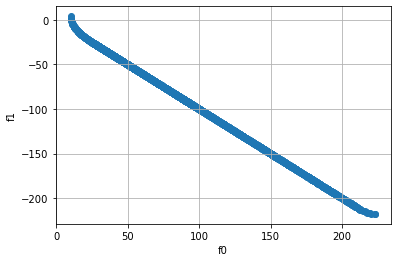

In [10]:
opt.plotfront(purged)